## Todo
1. Original Normal Data check (feature 별 data, scale ... )
2. Check Minmax Stats per Brand (featrue)
3. Min-max Normalize according to min-max stats 
4. Plot Histogram for each brand. (Plot together Before Norm. Vs. After Norm.)


In [126]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import csv
import torch

import random

In [123]:
# normal , abnormal car id 구분하기. (Brand별)
brandNum = 2

train_obj = glob(f"./Rawdata/Brand{brandNum}/Train_data/train_pkl_1000/*.pkl")
test_obj = glob(f"./Rawdata/Brand{brandNum}/Test_data/test_pkl_1000/*.pkl")

obj = train_obj + test_obj

car_to_label = {}
temp = {}
if brandNum in [1,2]:
    train_obj = glob(f"./Rawdata/Brand{brandNum}/Train_data/train_pkl_1000/*.pkl")
    test_obj = glob(f"./Rawdata/Brand{brandNum}/Test_data/test_pkl_1000/*.pkl")
    with open(f"./Rawdata/Brand{brandNum}/train_label.csv","r") as fread:
        reader = csv.DictReader(fread)
        for row in reader:
            car_to_label[int(row["car"])] = int(row["label"])

    with open(f"./Rawdata/Brand{brandNum}/test_label.csv","r") as fread:
        reader = csv.DictReader(fread)
        for row in reader:
            temp[int(row["car"])] = int(row["label"])
    car_to_label.update(temp)
else : 
    obj = glob(f"./Rawdata/Brand{brandNum}/brand{brandNum}_pkl_1000/*.pkl")
    with open(f"./Rawdata/Brand{brandNum}/all_label.csv","r") as fread:
        reader = csv.DictReader(fread)
        for row in reader:
            car_to_label[int(row["car"])] = int(row["label"])

print(car_to_label)



{201: 0, 202: 0, 203: 0, 204: 1, 205: 1, 206: 1, 207: 0, 208: 0, 209: 1, 210: 1, 211: 0, 212: 1, 213: 0, 214: 0, 215: 1, 216: 0, 217: 0, 218: 0, 219: 1, 220: 0, 221: 0, 222: 0, 223: 0, 224: 0, 225: 1, 226: 0, 227: 0, 228: 0, 229: 0, 230: 0, 231: 0, 232: 0, 233: 0, 234: 0, 235: 0, 236: 1, 237: 1, 238: 0, 239: 1, 240: 1, 241: 1, 242: 0, 243: 1, 244: 0, 245: 0, 246: 0, 247: 1, 248: 0, 249: 0, 250: 0}


In [124]:
# min max stat 확인 

minmax_obj = np.load(f"./Rawdata/Brand{brandNum}/minmax_stats_brand{brandNum}.npy",allow_pickle=True)
minmax_dict = minmax_obj.item()
print(f"Max : {minmax_dict['max']}")
print(f"Min : {minmax_dict['min']}")

col = torch.load("column.pkl")
print(col)

Max : [   3.62          0.          100.            4.30078125    4.28867188
   47.           45.         1270.        ]
Min : [   2.615      -200.2           0.            3.10546875    3.07226562
   -7.          -39.            0.        ]
['volt', 'current', 'soc', 'max_single_volt', 'min_single_volt', 'max_temp', 'min_temp', 'timestamp']


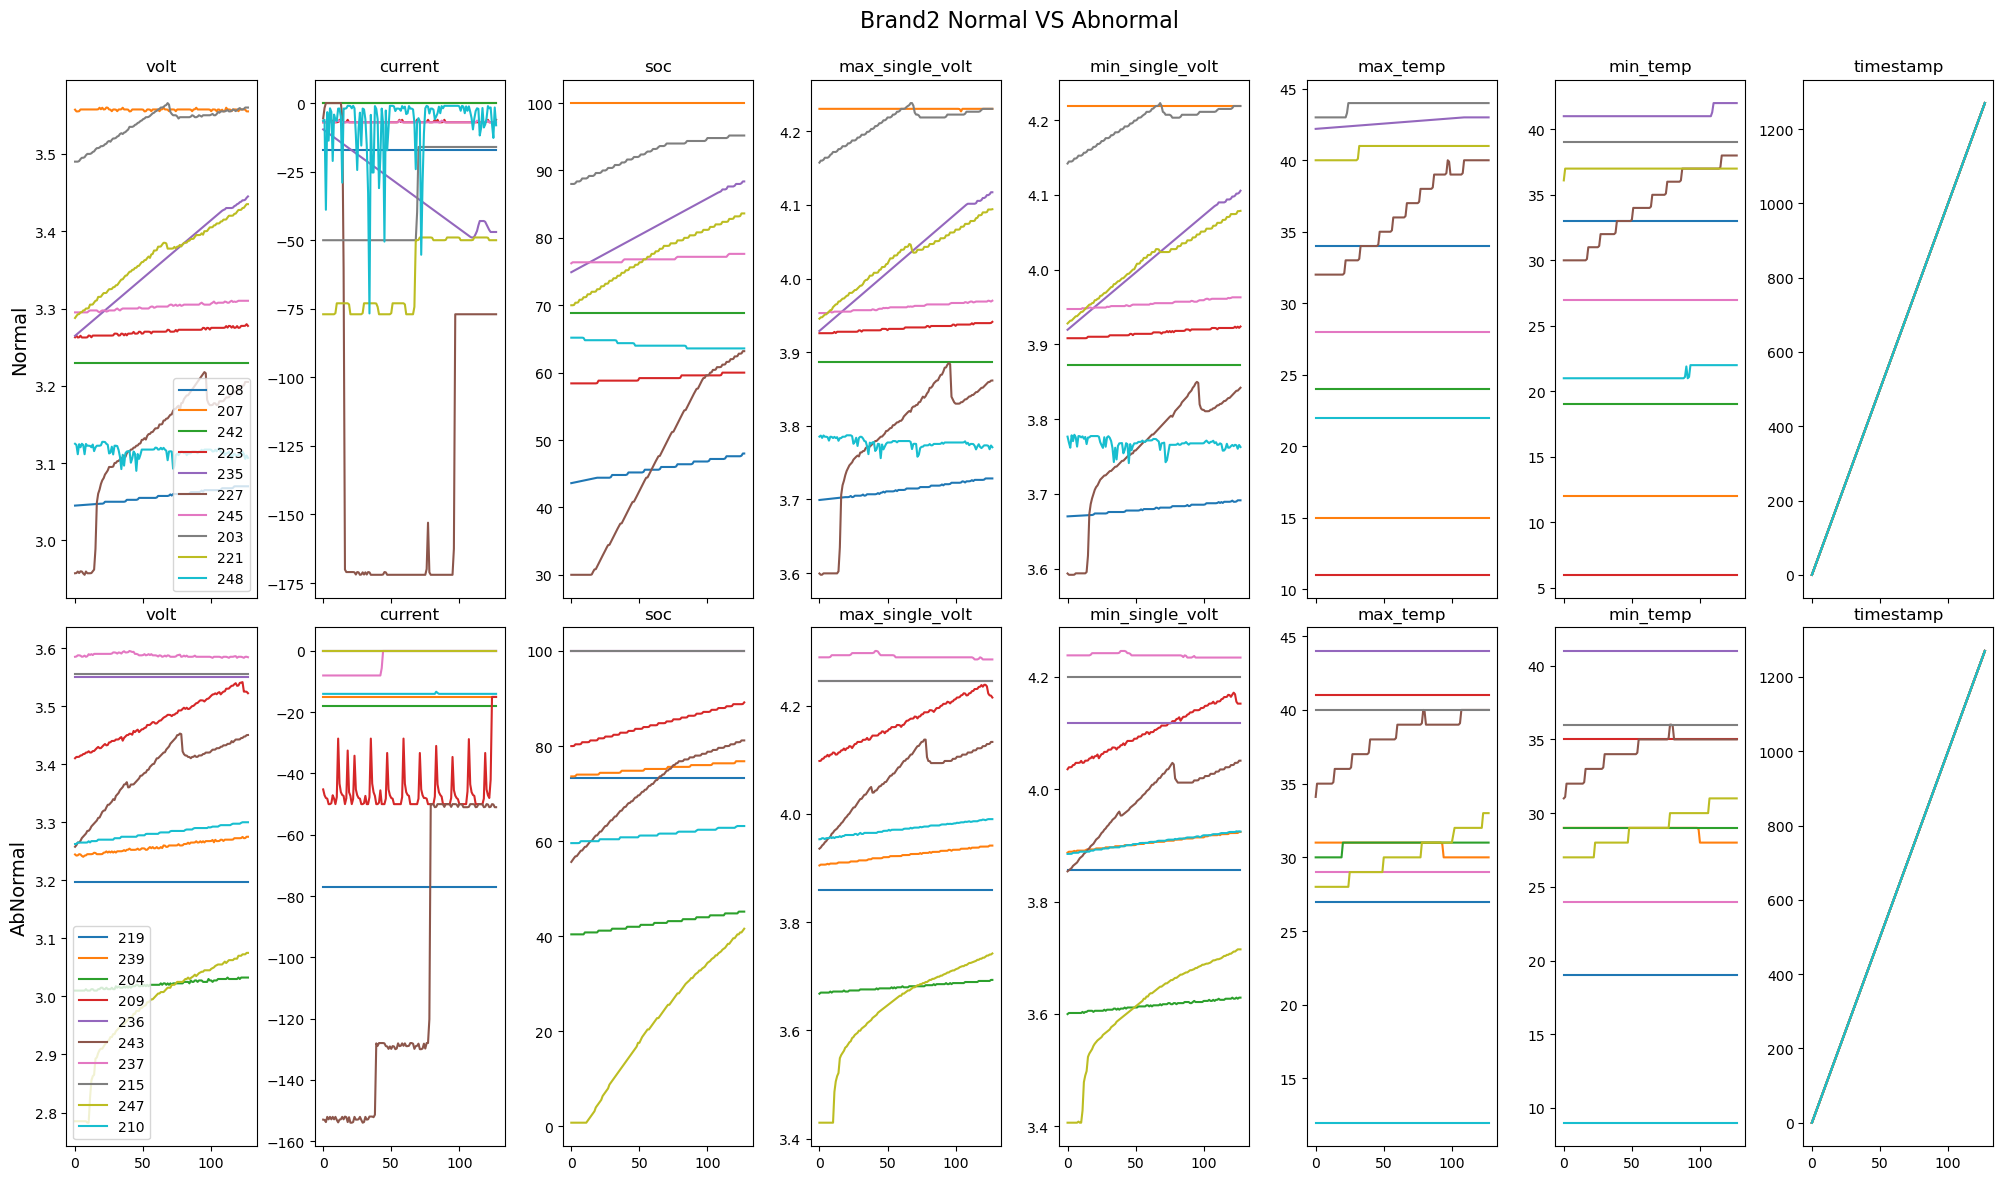

In [129]:
# snippet data 전부 받아서, test, train 별 data plot 하기
car_raw_data = {}
for i in obj:
    raw_data = torch.load(i,weights_only=False)
    car_raw_data.setdefault(int(raw_data[1]['car']),[]).append(raw_data[0])

fig,axes = plt.subplots(nrows=2,ncols=len(col),sharex=True,figsize=(20,12))
fig.suptitle(f"Brand{brandNum} Normal VS Abnormal",fontsize=16)
fig.tight_layout(rect=(0,0,1,0.97))
ax_n = axes[0,:]
ax_a = axes[1,:]
count_n = 0
count_a = 0
numOfCars=10

seed = 42
items = list(car_raw_data.items())
random.Random(seed).shuffle(items)
for cid , value in items:
    if car_to_label[cid]==0 and count_n < numOfCars:
        for i in range(len(col)):
            ax_n[i].set_title(col[i])
            ax_n[i].plot(value[0][:,i],label=str(cid))
        ax_n[0].legend()
        ax_n[0].set_ylabel("Normal",fontsize=14)
        count_n += 1
    elif car_to_label[cid]==1 and count_a < numOfCars:
        for i in range(len(col)):
            ax_a[i].set_title(col[i])
            ax_a[i].plot(value[0][:,i],label=cid)
        ax_a[0].set_ylabel("AbNormal",fontsize=14)
        ax_a[0].legend()
        count_a += 1

In [114]:
# Min-max Norm Via Brand all stats.

Max = 45.22
Min = -9.53
diff = Max - Min

In [115]:
norm_data_list = []
raw_data_list = []
for cid, values in car_raw_data.items():
    for data in values:
        data_norm = data.copy()
        raw_data_list.append(data)
        print(data)
        data_norm[:,0] = (data_norm[:,0]-Min)/diff
        print(data_norm)
        norm_data_list.append(data_norm)
        break
    break
car_data_raw = np.stack(raw_data_list,axis=0)
car_data_min_max = np.stack(norm_data_list,axis=0) # 길이가 모두 같을 경우,
print(car_data_min_max.shape)
print(car_data_raw.shape)


[[  -1.92010864   -8.02708333   60.56875    ...   32.
    30.            0.        ]
 [  -1.88895859   -7.99322917   60.59375    ...   32.
    30.           10.        ]
 [  -1.73320833   -7.959375     60.59375    ...   32.
    30.           20.        ]
 ...
 [   1.81789753   -7.92552083   62.1875     ...   32.
    30.         1250.        ]
 [   1.81789753   -7.959375     62.1875     ...   32.
    30.         1260.        ]
 [   1.81789753   -7.99322917   62.1875     ...   32.
    30.         1270.        ]]
[[ 1.38993449e-01 -8.02708333e+00  6.05687500e+01 ...  3.20000000e+01
   3.00000000e+01  0.00000000e+00]
 [ 1.39562400e-01 -7.99322917e+00  6.05937500e+01 ...  3.20000000e+01
   3.00000000e+01  1.00000000e+01]
 [ 1.42407154e-01 -7.95937500e+00  6.05937500e+01 ...  3.20000000e+01
   3.00000000e+01  2.00000000e+01]
 ...
 [ 2.07267535e-01 -7.92552083e+00  6.21875000e+01 ...  3.20000000e+01
   3.00000000e+01  1.25000000e+03]
 [ 2.07267535e-01 -7.95937500e+00  6.21875000e+01 ...  3.20

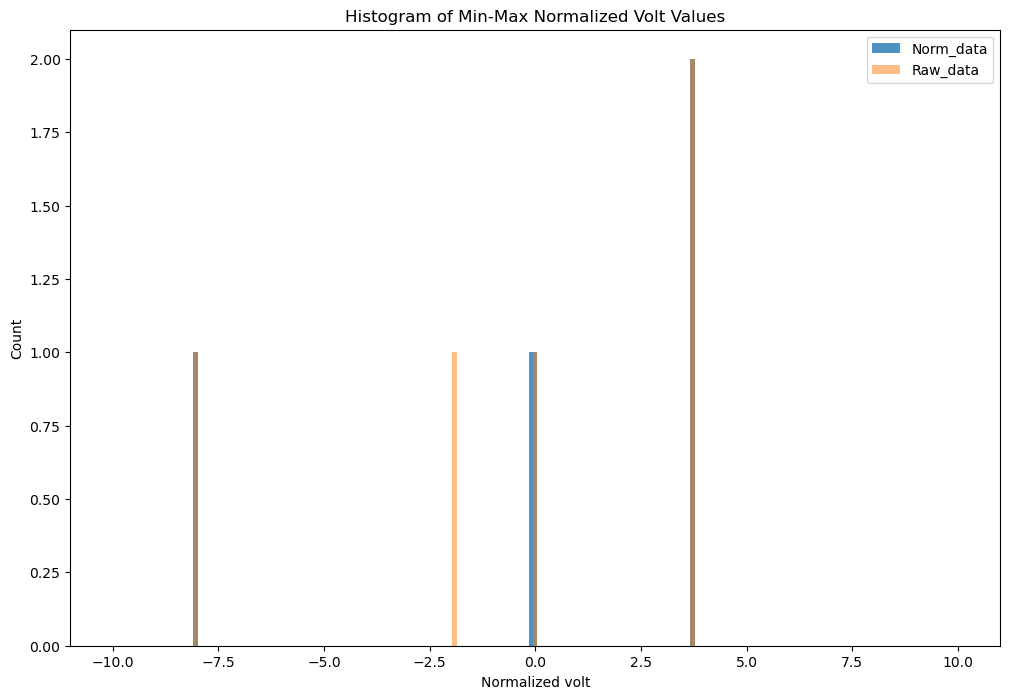

In [113]:
volt_vals = car_data_min_max[:,0].ravel() # (2000*128,)
volt_raw_vals = car_data_raw[:,0].ravel()

plt.figure(figsize=(12,8))
bins = np.linspace(-10,10,200)
plt.hist(volt_vals,bins=bins,label="Norm_data",alpha=0.8)
plt.hist(volt_raw_vals,bins=bins,label="Raw_data",alpha=0.5)
plt.legend()
plt.title("Histogram of Min-Max Normalized Volt Values")
plt.xlabel("Normalized volt")
plt.ylabel("Count")
plt.show()